<a href="https://colab.research.google.com/github/ThapaVinay/Handwritten_Digit_Recognition/blob/main/Handwritten_Digit_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# getting the data from the google drive

X_train = np.loadtxt('/content/drive/MyDrive/Handwriting digit recognition/train_X.csv', delimiter=',').T
Y_train = np.loadtxt('/content/drive/MyDrive/Handwriting digit recognition/train_label.csv', delimiter=',').T

X_test = np.loadtxt('/content/drive/MyDrive/Handwriting digit recognition/test_X.csv', delimiter=',').T
Y_test = np.loadtxt('/content/drive/MyDrive/Handwriting digit recognition/test_label.csv', delimiter=',').T

In [3]:
print("Shape of X_train :", X_train.shape)  # 28 * 28 pixels as input
print("Shape of Y_train :", Y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (784, 1000)
Shape of Y_train : (10, 1000)
Shape of X_test : (784, 350)
Shape of Y_test : (10, 350)


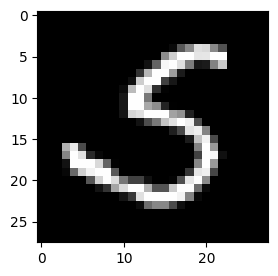

In [4]:
index = random.randrange(0, X_train.shape[1])
plt.figure(figsize=(3, 3))  # value is in inches
plt.imshow(X_train[:, index].reshape(28, 28), cmap='gray')  # convert the vector to 28*28 pixel values
plt.show()



## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat Below Steps for many times : *


## Forward Propagation

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$


In [5]:
def tanh(x):
  return np.tanh(x)

def relu(x):
  return np.maximum(0,x)

def softmax(x):
  expX = np.exp(x)
  return expX/np.sum(expX, axis  = 0)

In [6]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)



# Initialise Parameters

In [18]:
def initialize_parameters(n_x, n_h, n_y):
  w1 = np.random.randn(n_h, n_x)*0.001
  b1 = np.zeros((n_h,1))

  w2 = np.random.randn(n_y, n_h)*0.001
  b2 = np.zeros((n_y,1))

  parameters = {
      "w1" : w1,
      "b1" : b1,
      "w2" : w2,
      "b2" : b2,
  }

  return parameters

# Forward propagation

In [14]:
def forward_propagation(x, parameters):
  w1 = parameters['w1']
  b1 = parameters['b1']

  w2 = parameters['w2']
  b2 = parameters['b2']

  z1 = np.dot(w1, x) + b1
  a1 = relu(z1)

  z2 = np.dot(w2, a1) + b2
  a2 = softmax(z2)

  forward_cache = {
      'z1' : z1,
      'a1' : a1,
      'z2' : z2,
      'a2' : a2
  }
  return forward_cache

In [9]:
def cost_function(a2, y):
  m = y.shape[1]

  cost = -(1/m)*np.sum(y*np.log(a2))

  # cost = -(1/m)*np.sum(np.sum(y*np.log(a2,0), 1))

  return cost

# Back Propagation

In [10]:
def backward_prop(x, y, parameters, forward_cache):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]

    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return gradients

In [11]:
def update_parameters(parameters, gradients, learning_rate):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

# Model

In [12]:
def model(x, y, n_h, learning_rate, iterations):

    n_x = x.shape[0]
    n_y = y.shape[0]

    cost_list = []

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iterations):

        forward_cache = forward_propagation(x, parameters)

        cost = cost_function(forward_cache['a2'], y)

        gradients = backward_prop(x, y, parameters, forward_cache)

        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)

    return parameters, cost_list

In [21]:
iterations = 100
n_h = 1000
learning_rate = 0.03
Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.301828932695746
Cost after 10 iterations is : 0.9034890195443273
Cost after 20 iterations is : 0.5076503855833021
Cost after 30 iterations is : 0.43191236891991575
Cost after 40 iterations is : 0.39329151595505274
Cost after 50 iterations is : 0.37126622968923245
Cost after 60 iterations is : 0.3594939929875412
Cost after 70 iterations is : 0.354951235594882
Cost after 80 iterations is : 0.3563733460772969
Cost after 90 iterations is : 0.36277749920619246


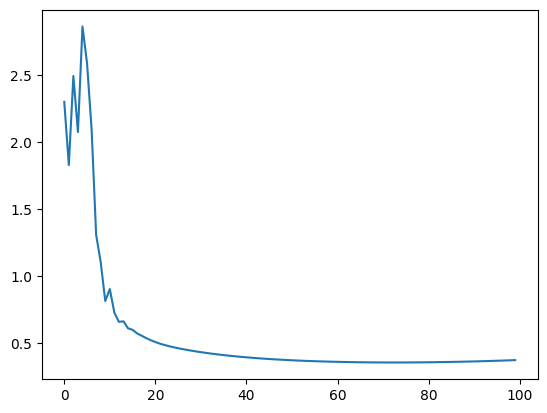

In [22]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

In [23]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)

    a_out = np.argmax(a_out, 0)  # 0 represents row wise

    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels)*100

    return acc

In [24]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 94.6 %
Accuracy of Test Dataset 87.14 %


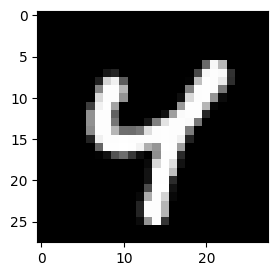

Our model says it is : 4


In [51]:
index = random.randrange(0, X_test.shape[1])
plt.figure(figsize=(3, 3))  # value is in inches
plt.imshow(X_test[:, index].reshape(28, 28), cmap='gray')  # convert the vector to 28*28 pixel values
plt.show()

forward_cache = forward_propagation(X_test[:, index].reshape(X_test[:, index].shape[0], 1), Parameters)
a_pred = forward_cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])